In [2]:
import pandas as pd

In [4]:
accounts = pd.read_csv("../data/accounts.csv")
alliance_ff = pd.read_csv("../data/alliance_ff.csv")
alliance_membership = pd.read_csv("../data/alliance_membership.csv")
messages_1 = pd.read_csv("../data/cleaned_messages_1.csv")
messages_2 = pd.read_csv("../data/cleaned_messages_2.csv")

## Mini analysis to understand possible vulnerable users (low interaction users + in a risky alliance)

In [5]:
#get the mean number of messages per account
mean_messages = messages_2.groupby('account_id')['timestamp'].count().mean()

In [6]:
#find the users with the lowest interaction
percentages = messages_2.groupby('account_id')['timestamp'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=True) \
                             .head(5)
low_interaction_users = percentages[percentages["count"] < mean_messages].account_id

In [7]:
#find the alliances of the users with the lowest interaction
allies_low_interaction_users = messages_2[messages_2["account_id"].isin(low_interaction_users.unique())]["alliance_id"]

In [8]:
#get the risky allies: we specified being risky with a general risk > 1.0
risky_allies = messages_2[messages_2["GENERAL_RISK"] > 1.0].alliance_id.unique()

In [9]:
#find the matches between the risky allies and the allies of the users with the lowest interaction
matches_found = [x for x in allies_low_interaction_users if x in risky_allies]
#get the user from messages_2 that are in low_interaction_users that have the alliance id in matches_found
affected_users = messages_2[messages_2["account_id"].isin(low_interaction_users.unique()) & messages_2["alliance_id"].isin(matches_found)]["account_id"]

In [10]:
affected_users

95759     9a304ad2233dcccd06c4cfee5d615c686ae38b00636ba1...
116241    00009fe7185adef70c1a19c70cba655dc0cf0e5304d50f...
164979    9a2e1d60da91bbee0a2faf4cd3f58ad9059b66ceb163ec...
Name: account_id, dtype: object

## Is there a real difference in term of general risk between family friendly and non family friendly alliances? Lets see!

In [11]:
family_friendly_alliances = alliance_ff[alliance_ff["family_friendly"]==1].alliance_id.unique()
non_family_friendly_alliances = alliance_ff[alliance_ff["family_friendly"]==-1].alliance_id.unique()

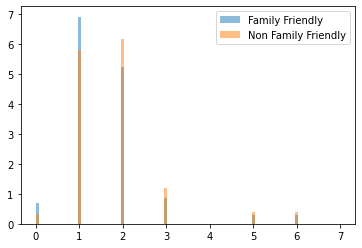

In [12]:
import matplotlib.pyplot as plt

# Get risk for family_friendly_alliances and non_family_friendly_alliances
family_friendly_risk = messages_2[messages_2["alliance_id"].isin(family_friendly_alliances)].GENERAL_RISK
non_family_friendly_risk = messages_2[messages_2["alliance_id"].isin(non_family_friendly_alliances)].GENERAL_RISK

plt.hist(family_friendly_risk, bins=100, density=True, alpha=0.5, label="Family Friendly", linewidth=2)
plt.hist(non_family_friendly_risk, bins=100, density=True, alpha=0.5, label="Non Family Friendly", linewidth=2)
plt.legend(loc="upper right")
plt.show()



As we can see, family friendly tend to dominate low risk allies (0,1 general risk), while non-family friendly alliances tend to be a bit more riskier